# Mall Customer Segmentation Analysis

This notebook aims to analyze the Mall Customer data to understand the customer segments using clustering techniques.


## Importing Libraries


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

## Loading the Data


In [9]:
file_path = '../data/Mall_Customers.csv'
mall_customers_df = pd.read_csv(file_path)

In [10]:
mall_customers_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Cleaning

In [11]:
missing_values = mall_customers_df.isnull().sum()
missing_values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
duplicate_rows = mall_customers_df[mall_customers_df.duplicated()]
duplicate_rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


## Exploratory Data Analysis


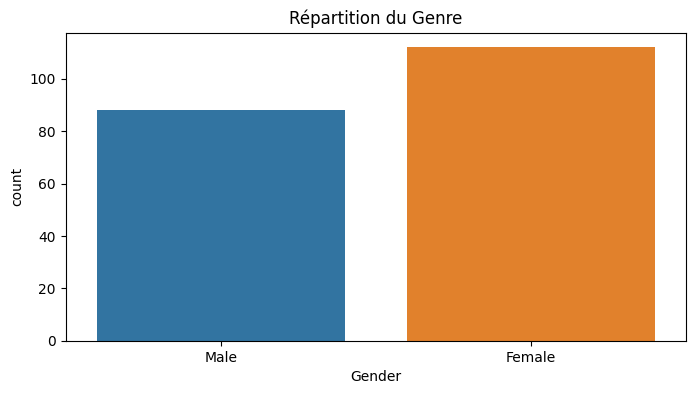

In [13]:
# Répartition du genre
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=mall_customers_df)
plt.title('Répartition du Genre')
plt.show()

/var/folders/rt/0hb6rtq14291d__lx9m1jbd00000gn/T/ipykernel_70637/1351971139.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(mall_customers_df.corr(), annot=True, cmap='coolwarm')


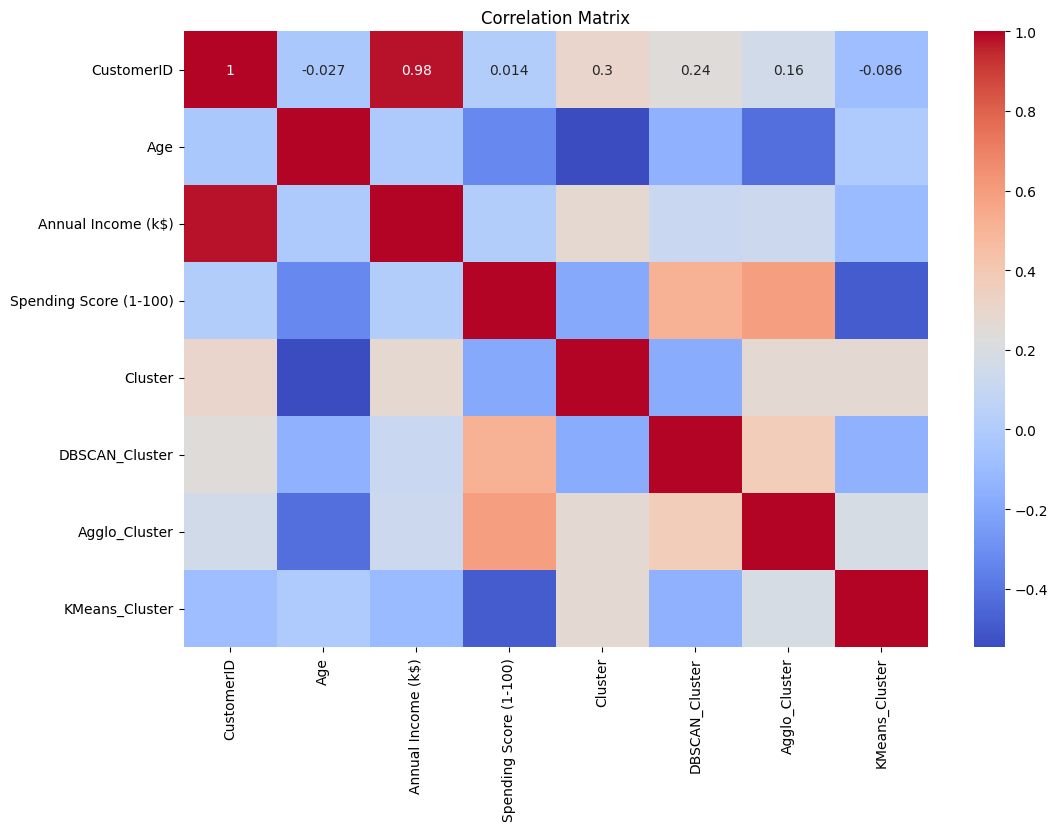

In [38]:
plt.figure(figsize=(12, 8))
sns.heatmap(mall_customers_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

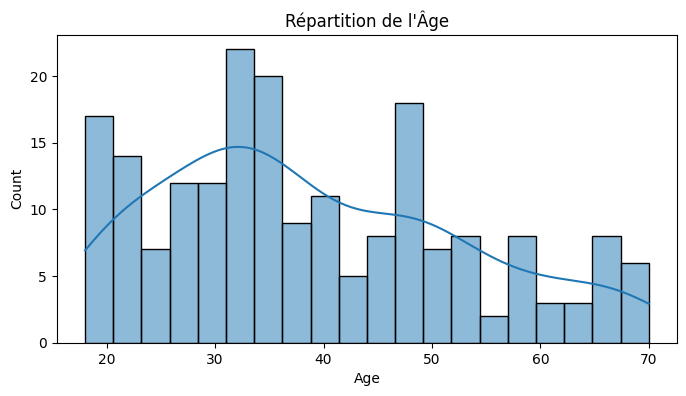

In [14]:
# Répartition de l'âge
plt.figure(figsize=(8, 4))
sns.histplot(mall_customers_df['Age'], kde=True, bins=20)
plt.title('Répartition de l\'Âge')
plt.show()

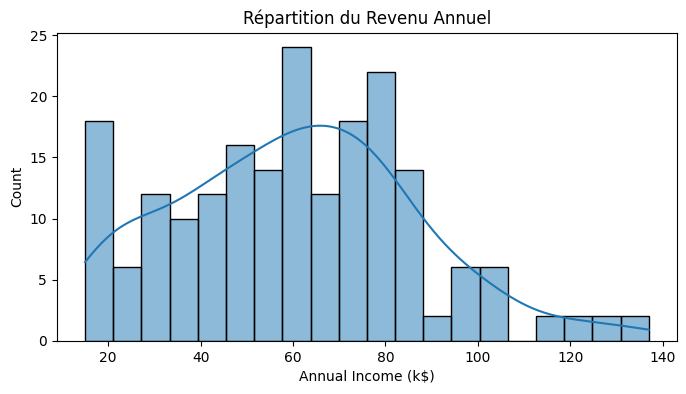

In [15]:
# Répartition du revenu annuel
plt.figure(figsize=(8, 4))
sns.histplot(mall_customers_df['Annual Income (k$)'], kde=True, bins=20)
plt.title('Répartition du Revenu Annuel')
plt.show()

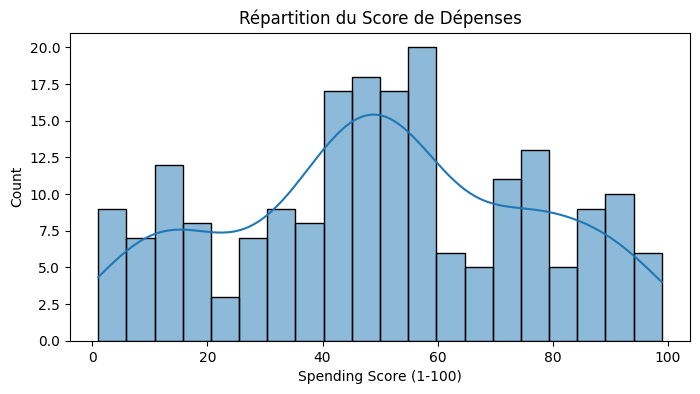

In [16]:
# Répartition du score de dépenses
plt.figure(figsize=(8, 4))
sns.histplot(mall_customers_df['Spending Score (1-100)'], kde=True, bins=20)
plt.title('Répartition du Score de Dépenses')
plt.show()

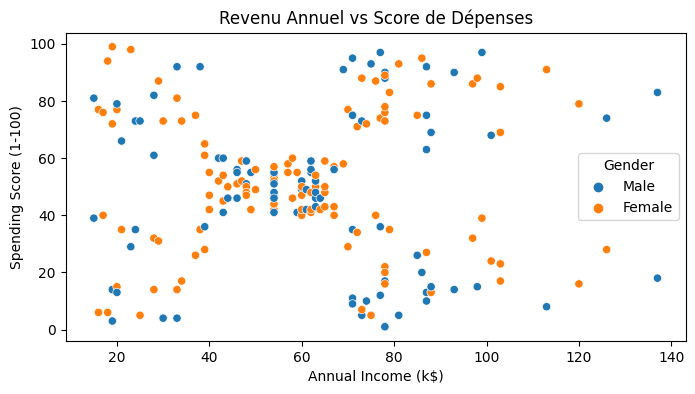

In [17]:
# Relation entre revenu annuel et score de dépenses
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=mall_customers_df)
plt.title('Revenu Annuel vs Score de Dépenses')
plt.show()

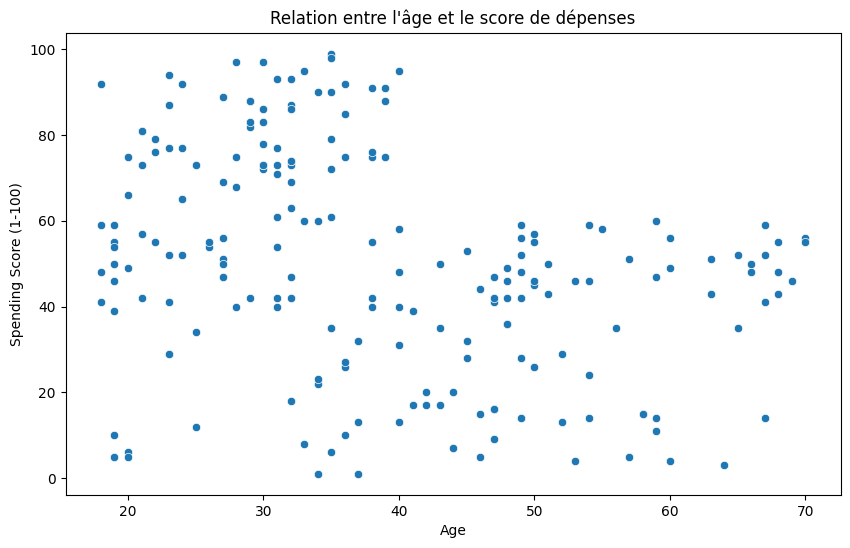

In [18]:
# Visualiser la relation entre l'âge et le score de dépenses
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall_customers_df)
plt.title('Relation entre l\'âge et le score de dépenses')
plt.show()

# Preprocessing

In [19]:
# Sélection des variables pertinentes
features = mall_customers_df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalisation des données
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Affichage des premières lignes des données normalisées
scaled_features[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

# Méthode du coude

In [20]:
from sklearn.cluster import KMeans

# Calcul des distortions pour différents nombres de clusters
distortions = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

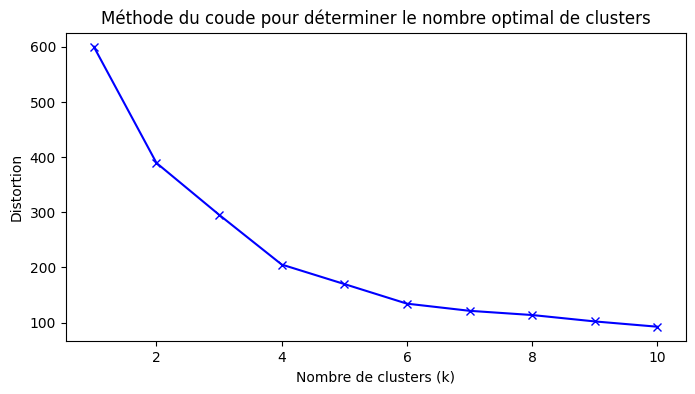

In [21]:
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Distortion')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

# K-Means

In [22]:
# Application de K-means avec k = 4
kmeans = KMeans(n_clusters=4, random_state=42)
mall_customers_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Ajout des centres des clusters pour visualisation
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

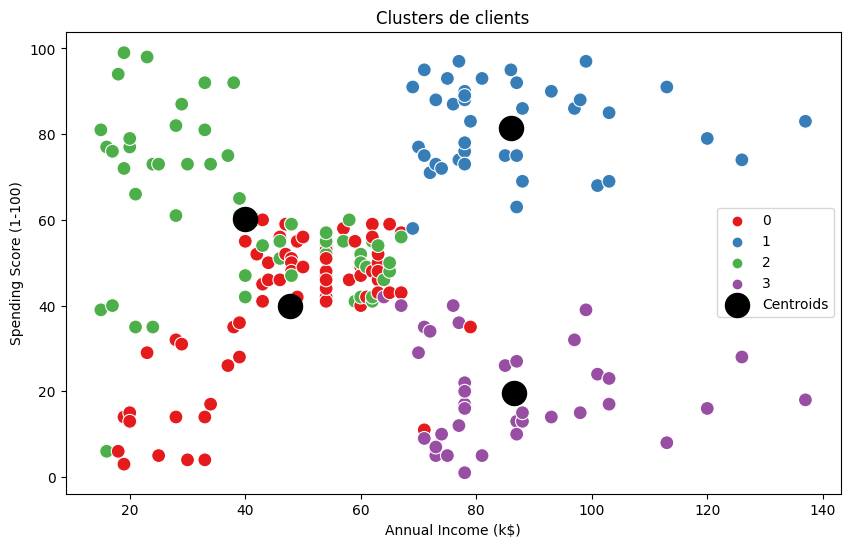

,Age,Annual Income (k$),Spending Score (1-100)
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


In [23]:
# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=mall_customers_df, palette='Set1', s=100)
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 2], s=300, c='black', label='Centroids')
plt.title('Clusters de clients')
plt.legend()
plt.show()

# Affichage des centres des clusters
cluster_centers_df

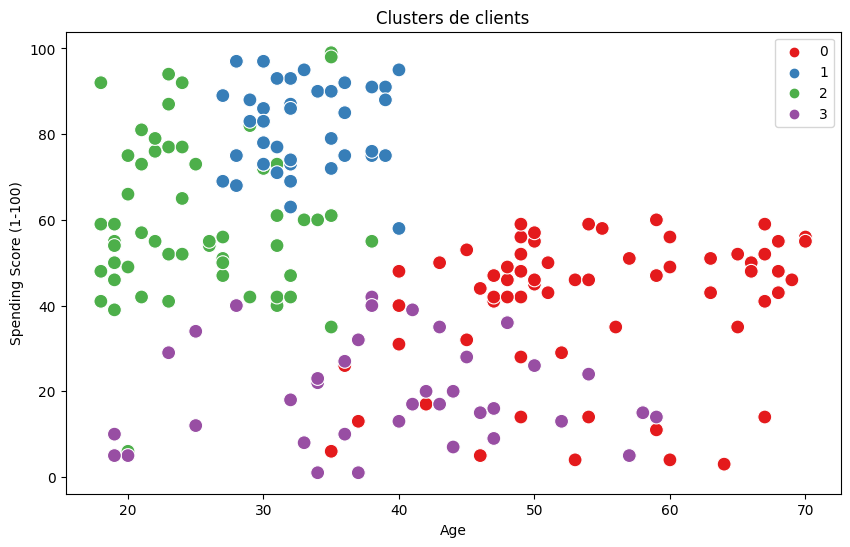

,Age,Annual Income (k$),Spending Score (1-100)
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


In [40]:
# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=mall_customers_df, palette='Set1', s=100)
plt.title('Clusters de clients')
plt.legend()
plt.show()

# Affichage des centres des clusters
cluster_centers_df

In [24]:
cluster_profiles = mall_customers_df.groupby('Cluster').mean()
cluster_profiles

/var/folders/rt/0hb6rtq14291d__lx9m1jbd00000gn/T/ipykernel_70637/4019043590.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_profiles = mall_customers_df.groupby('Cluster').mean()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,69.415385,53.984615,47.707692,39.969231
1,161.025000,32.875000,86.100000,81.525000
2,53.438596,25.438596,40.000000,60.298246
3,160.552632,39.368421,86.500000,19.578947


# Agglomerative Clustering

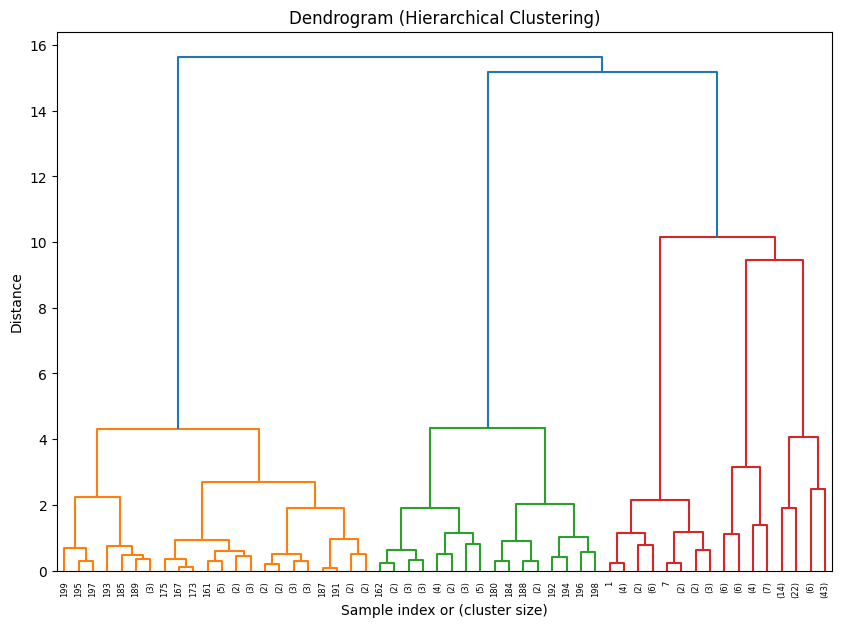

In [43]:
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrogram (Hierarchical Clustering)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

In [44]:
agg_cluster = AgglomerativeClustering(n_clusters=5)
mall_customers_df['Agg_Cluster'] = agg_cluster.fit_predict(scaled_features)

mall_customers_df.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster,DBSCAN_Cluster,Agglo_Cluster,KMeans_Cluster,Agg_Cluster
0,1,Male,19,15,39,2,0,0,4,4
1,2,Male,21,15,81,2,0,3,2,3
2,3,Female,20,16,6,2,0,0,4,4
3,4,Female,23,16,77,2,0,3,2,3
4,5,Female,31,17,40,2,0,0,4,4
5,6,Female,22,17,76,2,0,3,2,3
6,7,Female,35,18,6,0,0,0,4,4
7,8,Female,23,18,94,2,0,3,2,3
8,9,Male,64,19,3,0,0,0,4,4
9,10,Female,30,19,72,2,0,3,2,3


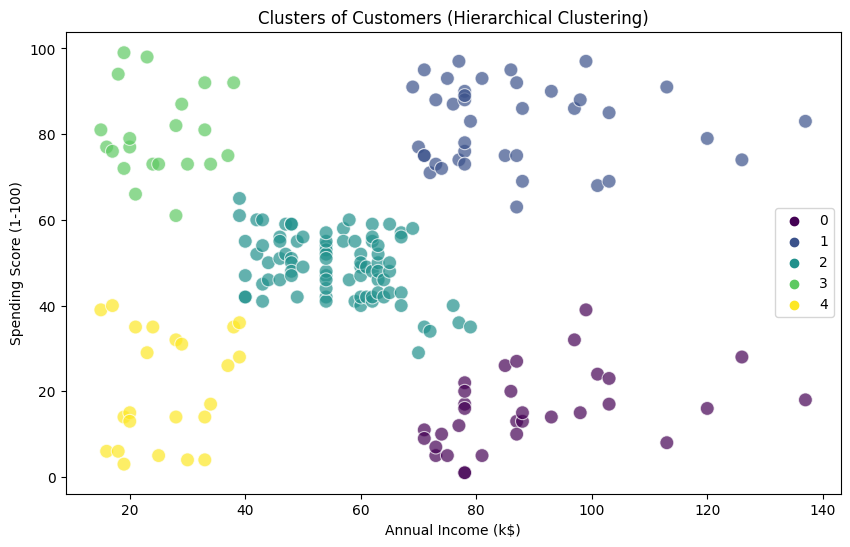

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mall_customers_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Agg_Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (Hierarchical Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

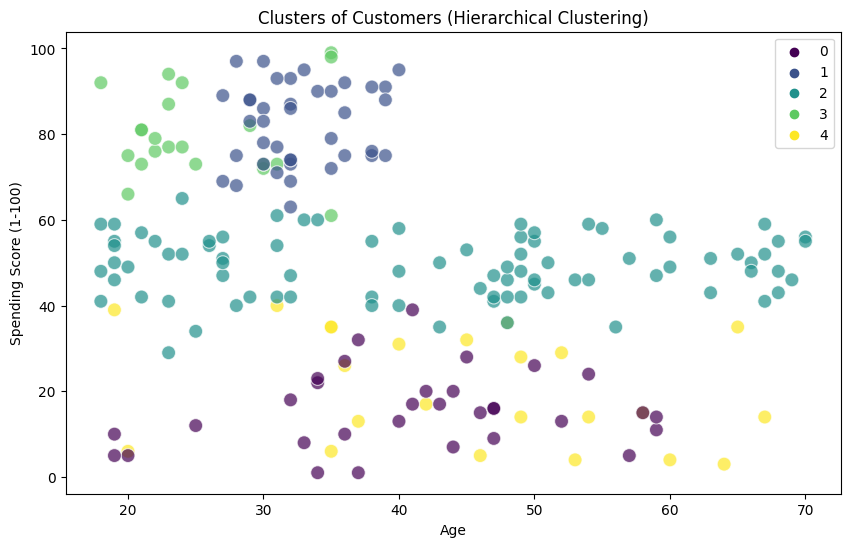

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mall_customers_df, x='Age', y='Spending Score (1-100)', hue='Agg_Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers (Hierarchical Clustering)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Visualiser les clusters selon l'âge


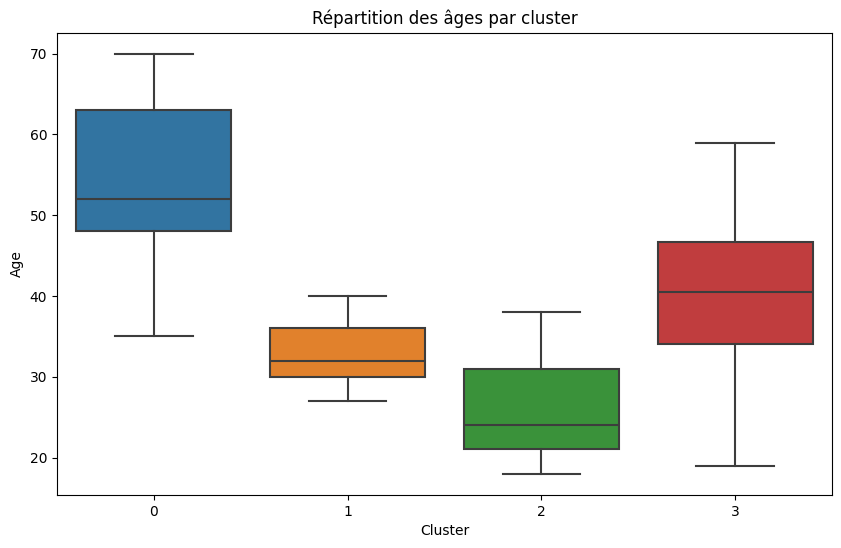

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=mall_customers_df)
plt.title('Répartition des âges par cluster')
plt.show()

# Visualiser les clusters selon le genre


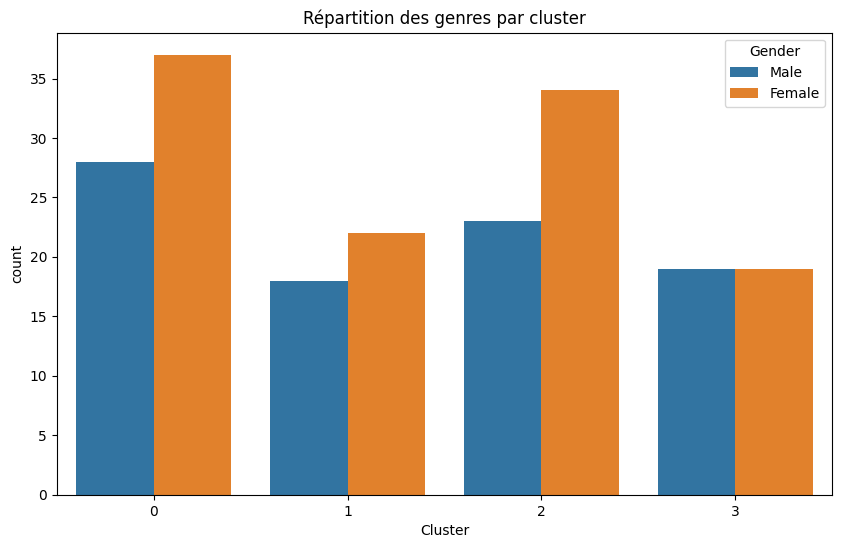

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Gender', data=mall_customers_df)
plt.title('Répartition des genres par cluster')
plt.show()

# Visualiser les clusters selon les revenus annuels


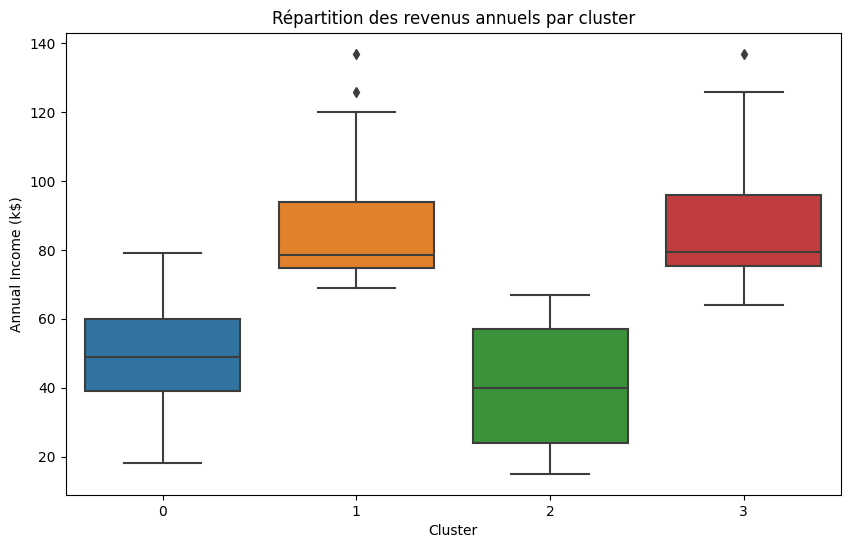

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=mall_customers_df)
plt.title('Répartition des revenus annuels par cluster')
plt.show()

# Evaluation

In [48]:
kmeans_silhouette = silhouette_score(scaled_features, mall_customers_df['Cluster'])
hierarchical_silhouette = silhouette_score(scaled_features, mall_customers_df['Agg_Cluster'])

kmeans_silhouette, hierarchical_silhouette

(0.2693971072112653, 0.5538089226688662)